In [2]:
import pandas as pd
import requests

# Basic API request

In [3]:
# Define API endpoint
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json"

# Send request
response = requests.get(url)

# Convert response to JSON
data = response.json()

# Print first few records
print(data[:1])

[{'unique_key': '64304343', 'created_date': '2025-03-10T01:51:23.000', 'agency': 'NYPD', 'agency_name': 'New York City Police Department', 'complaint_type': 'Illegal Parking', 'descriptor': 'Blocked Hydrant', 'location_type': 'Street/Sidewalk', 'incident_zip': '10461', 'incident_address': '2849 EAST  195 STREET', 'street_name': 'EAST  195 STREET', 'cross_street_1': 'MAYFLOWER AVENUE', 'cross_street_2': 'HOBART AVENUE', 'intersection_street_1': 'MAYFLOWER AVENUE', 'intersection_street_2': 'HOBART AVENUE', 'address_type': 'ADDRESS', 'city': 'BRONX', 'landmark': 'EAST  195 STREET', 'status': 'In Progress', 'community_board': '10 BRONX', 'bbl': '2042420057', 'borough': 'BRONX', 'x_coordinate_state_plane': '1030502', 'y_coordinate_state_plane': '250176', 'open_data_channel_type': 'MOBILE', 'park_facility_name': 'Unspecified', 'park_borough': 'BRONX', 'latitude': '40.853229109739914', 'longitude': '-73.83281000651391', 'location': {'latitude': '40.853229109739914', 'longitude': '-73.83281000

In [4]:
pd.DataFrame(response.json())

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,closed_date,resolution_description,bridge_highway_name,road_ramp,bridge_highway_segment,taxi_pick_up_location,bridge_highway_direction,taxi_company_borough,facility_type,due_date
0,64304343,2025-03-10T01:51:23.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10461,2849 EAST 195 STREET,EAST 195 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64298986,2025-03-10T01:51:14.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10466,635 EAST 229 STREET,EAST 229 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64304259,2025-03-10T01:50:57.000,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10040,35 HILLSIDE AVENUE,HILLSIDE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64305250,2025-03-10T01:50:45.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10467,2911 BARNES AVENUE,BARNES AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,64300654,2025-03-10T01:50:43.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460,1461 BRYANT AVENUE,BRYANT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,64300996,2025-03-09T22:01:00.000,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10314,140 ALBERTA AVENUE,ALBERTA AVENUE,...,2025-03-09T22:55:24.000,The Police Department responded to the complai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,64302071,2025-03-09T22:00:57.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10455,455 EAST 146 STREET,EAST 146 STREET,...,2025-03-09T22:11:50.000,The Police Department responded to the complai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,64301857,2025-03-09T22:00:28.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11355,43-10 KISSENA BOULEVARD,KISSENA BOULEVARD,...,2025-03-10T01:03:32.000,The Police Department responded to the complai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,64300860,2025-03-09T22:00:28.000,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11101,5-47 50 AVENUE,50 AVENUE,...,2025-03-09T22:14:35.000,The Police Department responded to the complai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filtering with http parameters

In [5]:
params = {
    "$limit": 5,
    "$where": "complaint_type='Noise' AND borough='MANHATTAN'"
}

response = requests.get(url, params=params)
smaller_data = response.json()

for record in smaller_data:
    print(record["descriptor"], " - ", record["incident_address"])

Noise: Alarms (NR3)  -  WEST   26 STREET
Noise, Barking Dog (NR5)  -  829 9 AVENUE
Noise, Barking Dog (NR5)  -  105 DUANE STREET
Noise, Barking Dog (NR5)  -  200 EAST   72 STREET
Noise, Barking Dog (NR5)  -  355 8 AVENUE


# Visualize a query

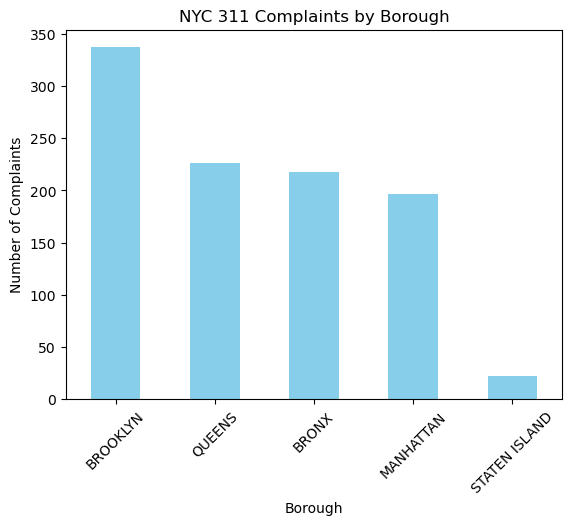

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Fetch complaints
params = {"$limit": 1000}
response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)

# Count complaints per borough
complaint_counts = df["borough"].value_counts()

# Plot
complaint_counts.plot(kind="bar", title="NYC 311 Complaints by Borough", color="skyblue")
plt.xlabel("Borough")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.show()